## Imports; Getting & Cleaning Data

In [1]:
from __future__ import print_function
import numpy as np 
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%pylab inline
import os 
import sys
import json
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Code from github repo fedhere/PUI2017/HW4
#check if the env variable PUIDATA exists
if os.getenv("PUIDATA") is None:
    print ("must set PUIDATA env variable")
    sys.exit()

def getCitiBikeCSV(datestring):
    '''Downloads citibike data and unzips it. If the data is downloaded by not unzippeds it zips it. Moves the data to $PUIDATA
    Arguments:
        date string as yyyymm
    '''
    print ("Downloading", datestring)
    ### First I will check that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
datestring1 = '201601'
datestring2 = '201602'
getCitiBikeCSV(datestring1)
getCitiBikeCSV(datestring2)

file in place, you can continue
file in place, you can continue


In [4]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [5]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,461,2/1/2016 00:00:08,2/1/2016 00:07:49,480,W 53 St & 10 Ave,40.766697,-73.990617,524,W 43 St & 6 Ave,40.755273,-73.983169,23292,Subscriber,1966.0,1
1,297,2/1/2016 00:00:56,2/1/2016 00:05:53,463,9 Ave & W 16 St,40.742065,-74.004432,380,W 4 St & 7 Ave S,40.734011,-74.002939,15329,Subscriber,1977.0,1
2,280,2/1/2016 00:01:00,2/1/2016 00:05:40,3134,3 Ave & E 62 St,40.763126,-73.965269,3141,1 Ave & E 68 St,40.765005,-73.958185,22927,Subscriber,1987.0,1
3,662,2/1/2016 00:01:00,2/1/2016 00:12:02,537,Lexington Ave & E 24 St,40.740259,-73.984092,428,E 3 St & 1 Ave,40.724677,-73.987834,20903,Subscriber,1983.0,2
4,355,2/1/2016 00:01:41,2/1/2016 00:07:36,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,521,8 Ave & W 31 St,40.750967,-73.994442,23228,Subscriber,1978.0,1


In [6]:
df = df1.append(df2)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [7]:
df['date'] = pd.to_datetime(df['starttime'], infer_datetime_format=True)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12


# 1) Trip duration of bikers that ride during the day vs night

##### Note: "Night" is from 7pm to 7am and "Day" is from 7am to 7pm. (A time of 6:59am would be "Night"; A time of 6:59pm would be "Day")

##### Setting up data for this question

In [8]:
df['Hour'] = df['date'].dt.hour

In [9]:
df['Hour'] = df['Hour'].replace([19, 20, 21, 22, 23, 0, 1, 2, 3, 4, 5, 6], '0')
df['Hour'] = df['Hour'].replace([7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], '1')

In [10]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,Hour
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41,0
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45,0
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48,0
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06,0
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12,0


In [11]:
days = df['tripduration'][df['Hour'] == '1']
days = days.dropna()
nights = df['tripduration'][df['Hour'] == '0']
nights = nights.dropna()

In [12]:
days = np.asarray(days)
nights = np.asarray(nights)

In [13]:
print("Total Number of Rides: ", len(df))

Total Number of Rides:  1070352


In [14]:
print("Number of Day Rides: ", len(days))
print("Number of Night Rides: ", len(nights))

Number of Day Rides:  842534
Number of Night Rides:  227818


In [15]:
days_sample = np.random.choice(days, len(nights), replace=False)
len(days_sample)

227818

# K-S TEST

### Null Hypothesis (H0): Average trip duration for daytime rides and night time rides are from the same distribution.

#### Significance = 0.05

https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [16]:
scipy.stats.ks_2samp(days, nights)

Ks_2sampResult(statistic=0.06612310246719202, pvalue=0.0)

##### The null hypothesis can be rejected because the p value is low/0. 

###### Sorting for next tests

In [17]:
days_sample = sorted(days_sample)

In [18]:
nights = sorted(nights)

# PEARSONS

### Null Hypothesis (H0): There is not a correlation between trip duration of day rides and night rides. 

#### Significance = 0.05

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr

In [19]:
pearsonr_time = scipy.stats.pearsonr(days_sample, nights)
print("Pearson’s correlation coefficient & 2-tailed p-value:", pearsonr_time)

Pearson’s correlation coefficient & 2-tailed p-value: (0.97253760806214762, 0.0)


##### The null hypothesis can be rejected. The correlation coefficient is high. 

# SPEARMANS

### Null Hypothesis (H0): There is not a correlation between trip duration of day rides and night rides. 

#### Significance = 0.05

In [20]:
spearmanr_time = scipy.stats.spearmanr(days_sample, nights)
print(spearmanr_time)

SpearmanrResult(correlation=0.99999895287350804, pvalue=0.0)


##### The null hypothesis can be rejected. The correlation coefficient is high. 

# 2) age of bikers for trips originating in Manhattan and in Brooklyn

##### Setting up dataframe for this question

In [21]:
df['Age'] = 2017 - df['birth year']
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,Hour,Age
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41,0,59.0
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45,0,48.0
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48,0,35.0
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06,0,56.0
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12,0,65.0


Since the Citibike dataset (sadly) does not include 'Borough' as a datapoint, you need to back into it somehow. Ideally, you could use a reverse geocoder. Here, I'll hack it by plotting a map and estimating the lat/long boundaries of Manhattan and Brooklyn. I also referenced a map of Manhattan to look up lat/longs

##### 1: Manhattan 
##### 0: Brooklyn

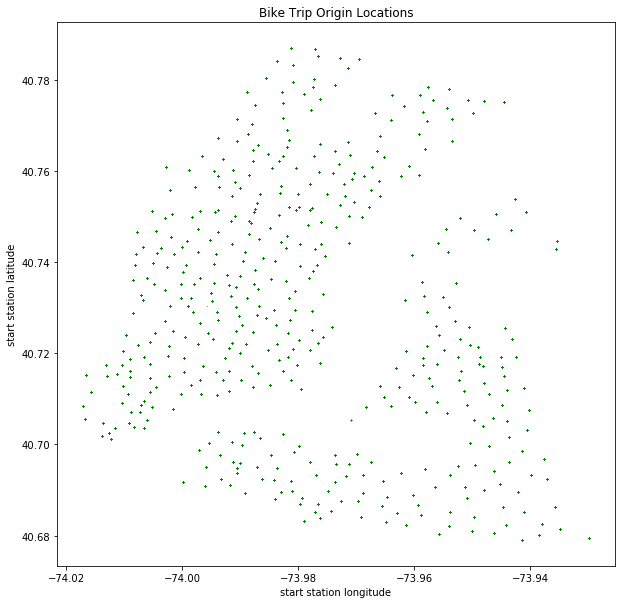

In [22]:
df.plot(kind="scatter", figsize=(10,10), x="start station longitude", y="start station latitude", color="green", 
             s=0.02, title = "Bike Trip Origin Locations")

In [23]:
lat_min = 40.701200
lat_max = 40.824720
long_min = -74.00837
long_max = -73.978843

In [24]:
def borough(lat_long): 
    lat, long = lat_long
    if (lat >= lat_min) & (lat <= lat_max) & (long >= long_min) & (long <= long_max):
        return 1
    else:
        return 0

In [25]:
df["Borough"] = df[['start station latitude' , 'start station longitude']].apply(borough, axis = 1)

In [26]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,Hour,Age,Borough
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1,2016-01-01 00:00:41,0,59.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1,2016-01-01 00:00:45,0,48.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2,2016-01-01 00:00:48,0,35.0,1
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2,2016-01-01 00:01:06,0,56.0,1
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1,2016-01-01 00:01:12,0,65.0,0


In [27]:
manhattan = df['Age'][df['Borough'] == 1]
manhattan = manhattan.dropna()
brooklyn = df['Age'][df['Borough'] == 0]
brooklyn = brooklyn.dropna()

In [28]:
manhattan = np.asarray(manhattan)
brooklyn = np.asarray(brooklyn)

In [29]:
print("Number of Manhattan Rides: ", len(manhattan))
print("Number of Brooklyn Rides: ", len(brooklyn))

Number of Manhattan Rides:  666804
Number of Brooklyn Rides:  349177


In [30]:
manhattan_sample = np.random.choice(manhattan, len(brooklyn), replace=False)
len(manhattan)

666804

# K-S TEST

### Null Hypothesis (H0): The ages of bike riders in Manhattan and Brooklyn are from the same distribution. 

#### Significance = 0.05

In [31]:
ks_boroughs = scipy.stats.ks_2samp(manhattan, brooklyn)
print(ks_boroughs)

Ks_2sampResult(statistic=0.038804695377497485, pvalue=2.587839117986006e-300)


##### The null hypothesis cannot be rejected. 

###### Sorting for next tests

In [32]:
manhattan_sample = sorted(manhattan_sample)
brooklyn = sorted(brooklyn)

### Pearsons

### Null Hypothesis (H0): There is no correlation between ages of riders from Manhattan and Brooklyn.

#### Significance = 0.05

In [33]:
pearsonr_boroughs = scipy.stats.pearsonr(manhattan_sample, brooklyn)
print("Pearson’s correlation coefficient & 2-tailed p-value:", pearsonr_boroughs)

Pearson’s correlation coefficient & 2-tailed p-value: (0.99730598304161888, 0.0)


##### The null hypothesis is rejected. 

### Spearmans

### Null Hypothesis (H0): There is no correlation between ages of riders from Manhattan and Brooklyn.

#### Significance = 0.05

In [34]:
spearmanr_boroughs = scipy.stats.spearmanr(manhattan_sample, brooklyn)
print(spearmanr_boroughs)

SpearmanrResult(correlation=0.9992316780434789, pvalue=0.0)


##### The null hypothesis is rejected. 